In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def FFT(s,t):
    fft = np.fft.fft(s)
    T = t[1] - t[0]  # sampling interval 
    N = s.size
    recreation = np.zeros(len(t))
    Amp = abs(fft)[0:N//2]
    Phase = np.angle(fft)[0:N//2]
    freq = np.linspace(0, 1 / T, N)[0:N//2]
    a = np.transpose([Amp, Phase, freq])
    a = a[a[:,2].argsort()]
    a = a[a[:,1].argsort(kind='mergesort')]
    a = a[a[:,0].argsort(kind='mergesort')]

    a = a[::-1, :]
    Amp = a[:,0]
    Phase = a[:,1]
    freq = a[:,2]

    harmonics =2

    for i in range(harmonics):
        A = Amp[i]
        P = Phase[i]
        FF = - A*np.cos(2*np.pi * freq[i] * t - P) *2/ N
        recreation = recreation + FF
    return Amp, Phase, freq, recreation

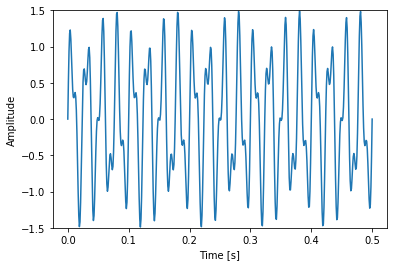

In [6]:
t = np.linspace(0, 0.5, 500)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.ylim(-1.5, 1.5)
plt.show()

In [7]:
Amp, Phase, freq, recreation = FFT(s,t)

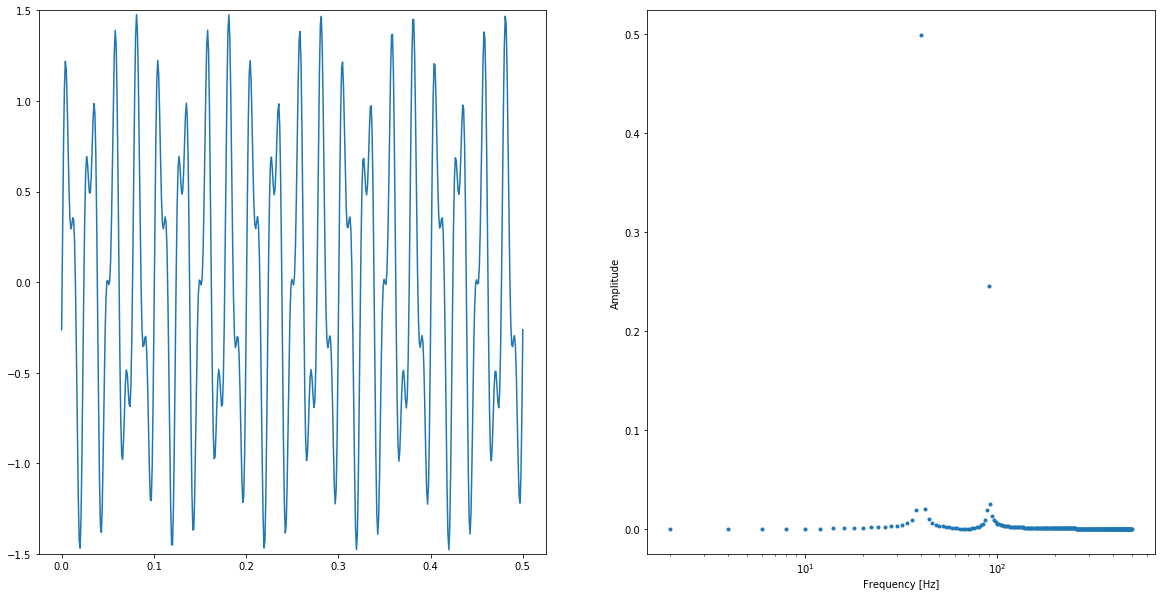

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(121)

plt.plot(t, recreation)
plt.ylim(-1.5, 1.5)

plt.subplot(122)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.semilogx(freq, Amp / s.size, '.')  # 1 / N is a normalization factor
plt.show()

plt.show()